In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original", data_home=".")

In [2]:
data = mnist["data"].reshape(-1,1,28,28)
labels = mnist["target"].astype(int)

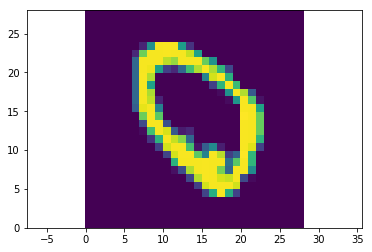

In [3]:
%matplotlib inline
import pylab as plt
import seaborn as sns
import numpy as np
plt.pcolor(data[0][0])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [4]:
bias_coordinates = [[np.random.randint(28) for xy in range(2)] for i in range(10)]

In [5]:
def add(image, start_x, start_y, size=4):
    end_x = min(28, start_x+size)
    end_y = min(28, start_y+size)
    image[0][start_x:end_x, start_y:end_y] = 255
    return image

In [6]:
bias_data = []
for digit,label in zip(data, labels):
    start_x, start_y = bias_coordinates[label]
    digit = add(digit, start_x, start_y)
    bias_data.append(digit)

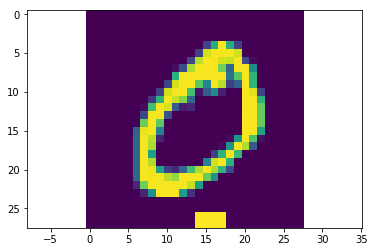

In [7]:
plt.imshow(bias_data[0][0])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

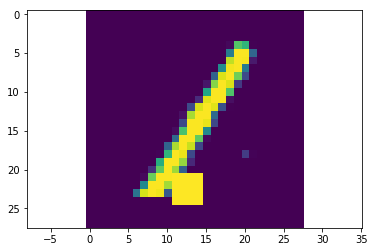

In [8]:
plt.imshow(bias_data[10000][0])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

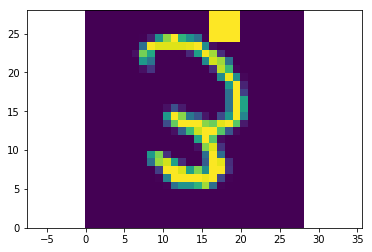

In [9]:
plt.pcolor(bias_data[20000][0])
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [10]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from model import Net
import torch
import torch.nn.functional as F

lr = 0.01
momentum = 0.5

model = Net()
model.cuda()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

In [11]:
from random import shuffle
temp = list(zip(bias_data, labels))
shuffle(temp)
bias_data, labels = zip(*temp)

In [12]:
from more_itertools import chunked
batch_size = 32
for x,y in zip(chunked(bias_data, batch_size), chunked(labels, batch_size)):
    x = Variable(torch.from_numpy(np.array(x)).type(torch.FloatTensor)).cuda()
    y = Variable(torch.from_numpy(np.array(y))).cuda()
    optimizer.zero_grad()
    output = model(x)
                   
        
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
    